<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [13]:
def dfs(G, origen, destino): 
    visited = set()
    stack = []
    stack.append(origen)
    
    expanded = 0
    parent = {origen:None}
    
    while stack:
        node = stack.pop()
        if node == destino:
            break
        if node not in visited:
            expanded += 1
            visited.add(node)
            nb =  G.neighbors(node)
            for elem in nb:
                if elem in visited:
                    continue
                stack.append(elem)
                parent[elem] = node
                
    node = destino
    path =[node]
    while node != origen:
        node = parent[node]
        path.append(node)
    path.reverse()
    return{
        'path' : path,
        'expanded' : expanded
    }

In [10]:
import networkx as nx
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

{'path': [1, 49, 95], 'expanded': 2}

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [5]:
def cnx(G): 
    componentes = []
    nodes = list(G.nodes())
    
    while nodes:
        node = nodes[0]
        path =[]
        stack = []
        stack.append(node)
        visited = set()
        
        while stack:
            nodo = stack.pop()
            if nodo not in visited:
                visited.add(nodo)
                path.append(nodo)
                nodes.remove(nodo)
                for n in G.neighbors(nodo):
                    if n in visited:
                        continue
                    stack.append(n)
                    
        componentes.append(path)

    return componentes

[[0, 11, 7, 6, 1, 9, 4, 8, 2, 5, 3, 10],
 [12, 17, 19, 20, 22, 21, 23, 16, 18, 15, 13, 14],
 [24, 31, 32, 30, 29, 28, 27, 26, 25],
 [33, 35, 34],
 [36, 41, 42, 44, 48, 46, 50, 49, 47, 45, 43, 40, 38, 37, 39]]

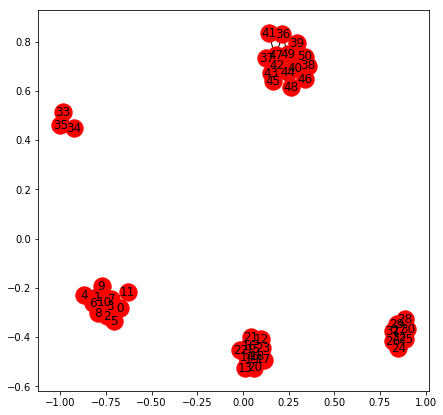

In [6]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)
cnx(G)